# Imports

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_squared_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(((y_true - y_pred)**2) / y_true)) * 100


# Load Data

In [7]:
data = pd.read_csv("data/data_cleaned.csv")

# Data Preparation

In [8]:
# one hot
data = pd.get_dummies(data, prefix = ["HEAT", "AC", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"], columns = ["HEAT", "AC", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"])

In [9]:
# split
x_data = data.drop(["PRICE"], axis=1)
y_data = data["PRICE"]

In [10]:
# normalization
x_data = x_data.astype(float)
x_data = x_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [11]:
# train & test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

# Linear Regression

R2 Score: -2.94405252651e+17
Explained variance score: -2.94366684355e+17
Mean absolute error: 2.8243062655e+12
Mean absolute percentage error: 731247768.56
Mean squared error: 6.08889711451e+28
Mean squared percentage error: 1.61389898121e+25


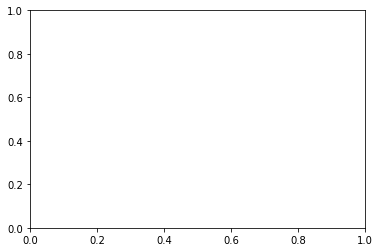

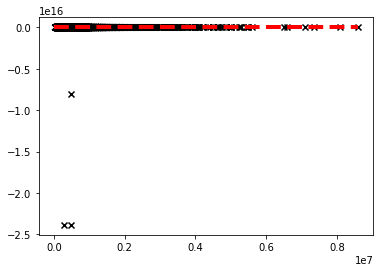

In [14]:
linreg = LinearRegression(n_jobs = -1)
linreg.fit(x_train, y_train)

y_pred_lin = linreg.predict(x_test)

lin_score = linreg.score(x_test, y_test)
lin_msqe = mean_squared_error(y_test, y_pred_lin)

print("R2 Score: " + str(r2_score(y_test, y_pred_lin)))
print("Explained variance score: " + str(explained_variance_score(y_test, y_pred_lin)))
print("Mean absolute error: " + str(mean_absolute_error(y_test, y_pred_lin)))
print("Mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred_lin)))
print("Mean squared error: " + str(mean_squared_error(y_test, y_pred_lin)))
print("Mean squared percentage error: " + str(mean_squared_percentage_error(y_test, y_pred_lin)))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lin, c='black', marker="x")
ax.plot([0, y_test.max()], [0, y_test.max()], "r--", lw=4)
plt.show()

# Lasso Regression

C:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


R2 Score: 0.707268632106
Explained variance score: 0.707275262306
Mean absolute error: 153931.634174
Mean absolute percentage error: 43.7666957143
Mean squared error: 60542777863.1
Mean squared percentage error: 11900641.1589


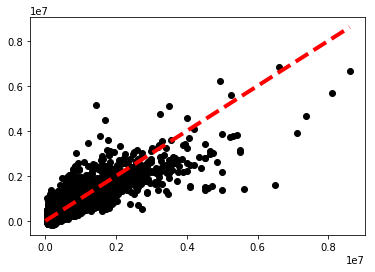

In [15]:
lassoreg = Lasso()
lassoreg.fit(x_train, y_train)

y_pred_lasso = lassoreg.predict(x_test)

lasso_score = lassoreg.score(x_test, y_test)
lasso_msqe = mean_squared_error(y_test, y_pred_lasso)

print("R2 Score: " + str(r2_score(y_test, y_pred_lasso)))
print("Explained variance score: " + str(explained_variance_score(y_test, y_pred_lasso)))
print("Mean absolute error: " + str(mean_absolute_error(y_test, y_pred_lasso)))
print("Mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred_lasso)))
print("Mean squared error: " + str(mean_squared_error(y_test, y_pred_lasso)))
print("Mean squared percentage error: " + str(mean_squared_percentage_error(y_test, y_pred_lasso)))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lasso, c='black')
ax.plot([0, y_test.max()], [0, y_test.max()], "r--", lw=4)
plt.show()

# Logistic Regression

In [ ]:
logreg = LogisticRegression(n_jobs=-1, solver="sag")
logreg.fit(x_train, y_train)

y_pred_log = logreg.predict(x_test)

lin_score = linreg.score(x_test, y_test)
lin_msqe = mean_squared_error(y_test, y_pred_log)

print("R2 Score: " + str(r2_score(y_test, y_pred_log)))
print("Explained variance score: " + str(explained_variance_score(y_test, y_pred_log)))
print("Mean absolute error: " + str(mean_absolute_error(y_test, y_pred_log)))
print("Mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred_log)))
print("Mean squared error: " + str(mean_squared_error(y_test, y_pred_log)))
print("Mean squared percentage error: " + str(mean_squared_percentage_error(y_test, y_pred_log)))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_log, c='black')
ax.plot([0, y_test.max()], [0, y_test.max()], "r--", lw=4)
plt.show()